In [1]:
import os
import pickle
import numpy as np
from matplotlib import pyplot as plt

os.chdir("../../")
cwd = os.getcwd()
from src.gpdssm.utils import get_random_state

In [2]:
Dx = 2
Dy = 2
N = 10000
X = [[0.0, 0.0]]
Y = []

random_state = get_random_state()
A = random_state.normal(0, 1, (Dy, Dx))
B = random_state.beta(1, 1, (Dy, Dx))
print(A)
print(B)

[[-1.41094505 -0.28032189]
 [-0.03494765 -0.30044379]]
[[0.67724808 0.13752576]
 [0.49581184 0.89142088]]


In [3]:
N = 10000

In [4]:
def x_process(x):
    x_next_1 = 0.9 * x[0] + 0.5 * np.sin(x[1]) + random_state.normal(0., 1.0e-2)
    x_next_2 = 0.5 * np.cos(x[0]) + 0.9 * x[1] + random_state.normal(0., 1.0e-2)
    return [x_next_1, x_next_2]

def generate_x_process(T):
    for t in range(T):
        x_next = x_process(X[-1])
        X.append(x_next)

In [5]:
generate_x_process(N)
X = np.array(X)

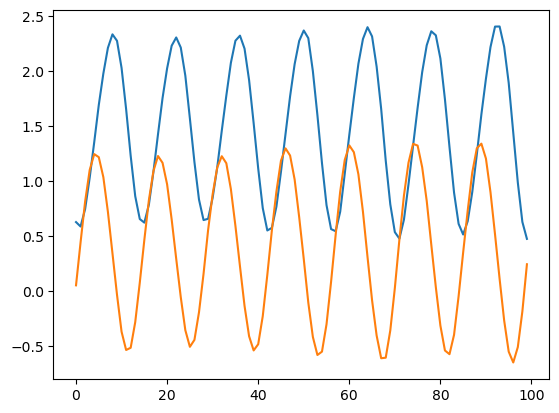

In [6]:
plt.plot(X[-100:, :])
plt.savefig(os.path.join(cwd, "plots", "case5", "x.png"))

In [7]:
def y_process(x):
    y = 1 / (1 + np.exp(-x+1))
    y = [1 if j > 0.5 else 0 for j in y]
    return y

def generate_y_process(T):
    for t in range(T):
        y_next = y_process(X[t+1])
        Y.append(y_next)

In [8]:
generate_y_process(N)
Y = np.array(Y)

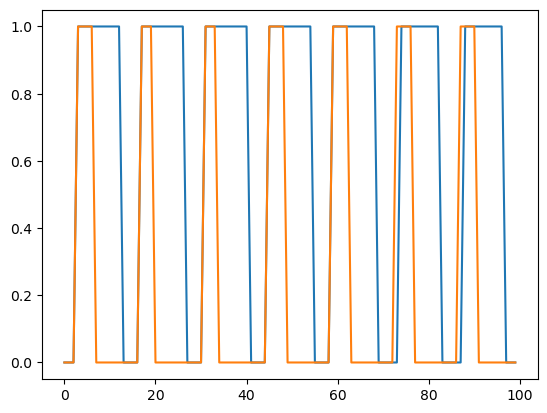

In [9]:
plt.plot(Y[-100:, :])
plt.savefig(os.path.join(cwd, "plots", "case5", "y.png"))

In [10]:
cwd = os.getcwd()
Y_path = os.path.join(cwd, "folds", "train_5_fold_1_Y.txt")
np.savetxt(Y_path, Y)

In [11]:
X_path = os.path.join(cwd, "folds", "train_5_fold_1_X.pickle")
with open(X_path, 'wb') as f:
    pickle.dump([X], f)